In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')

In [2]:
i_df = pd.read_csv(r'C:\Users\Abdullah Ahamed\Downloads\DS2_C5_S3_Income_Data_Challenge.csv')
i_df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
i_df.shape

(32561, 15)

In [4]:
i_df.dtypes

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

In [5]:
i_df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
print(i_df.isnull().sum())

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64


In [8]:
i_df['WorkClass']=i_df['WorkClass'].astype('category')
i_df['Education']=i_df['Education'].astype('category')
i_df['Marital_Status']=i_df['Marital_Status'].astype('category')
i_df['Occupation']=i_df['Occupation'].astype('category')
i_df['Relationship']=i_df['Relationship'].astype('category')
i_df['Race']=i_df['Race'].astype('category')
i_df['Gender']=i_df['Gender'].astype('category')
i_df['Native_Country']=i_df['Native_Country'].astype('category')
i_df['Income_Bracket']=i_df['Income_Bracket'].astype('category')

print(i_df.head())
print(i_df.dtypes)

   Age          WorkClass  Fnlwgt   Education  Education_Num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        Marital_Status          Occupation    Relationship    Race   Gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_Gain  Capital_Loss  Hours_Per_Week  Native_Country Income_Bracket  
0          2174             0              40   United-States

In [10]:
i_df['WorkClass']=i_df['WorkClass'].replace('?', i_df['WorkClass'].mode()[0])

In [11]:
i_df['Occupation']=i_df['Occupation'].replace('?', i_df['Occupation'].mode()[0])

In [12]:
i_df['Native_Country']=i_df['Native_Country'].replace('?', i_df['Native_Country'].mode()[0])

In [13]:
encoder = preprocessing.LabelEncoder()

encoder.fit(i_df['WorkClass'])
print(encoder.classes_)
i_df['WorkClass'] = encoder.transform(i_df['WorkClass'])

i_df.head()

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,7,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
encoder = preprocessing.LabelEncoder()

encoder.fit(i_df['Income_Bracket'])
print(encoder.classes_)
i_df['Income_Bracket'] = encoder.transform(i_df['Income_Bracket'])

i_df.head()

[' <=50K' ' >50K']


,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,7,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,6,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,4,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,4,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [39]:
encoder = preprocessing.LabelEncoder()

encoder.fit(i_df['Education'])
print(encoder.classes_)
i_df['Education'] = encoder.transform(i_df['Education'])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [40]:
encoder = preprocessing.LabelEncoder()

encoder.fit(i_df['Marital_Status'])
print(encoder.classes_)
i_df['Marital_Status'] = encoder.transform(i_df['Marital_Status'])

[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']


In [41]:
encoder = preprocessing.LabelEncoder()

encoder.fit(i_df['Occupation'])
print(encoder.classes_)
i_df['Occupation'] = encoder.transform(i_df['Occupation'])

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [42]:
encoder = preprocessing.LabelEncoder()

encoder.fit(i_df['Relationship'])
print(encoder.classes_)
i_df['Relationship'] = encoder.transform(i_df['Relationship'])

[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']


In [43]:
encoder = preprocessing.LabelEncoder()

encoder.fit(i_df['Gender'])
print(encoder.classes_)
i_df['Gender'] = encoder.transform(i_df['Gender'])

[' Female' ' Male']


In [44]:
encoder = preprocessing.LabelEncoder()

encoder.fit(i_df['Native_Country'])
print(encoder.classes_)
i_df['Native_Country'] = encoder.transform(i_df['Native_Country'])

[' ?' ' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba'
 ' Dominican-Republic' ' Ecuador' ' El-Salvador' ' England' ' France'
 ' Germany' ' Greece' ' Guatemala' ' Haiti' ' Holand-Netherlands'
 ' Honduras' ' Hong' ' Hungary' ' India' ' Iran' ' Ireland' ' Italy'
 ' Jamaica' ' Japan' ' Laos' ' Mexico' ' Nicaragua'
 ' Outlying-US(Guam-USVI-etc)' ' Peru' ' Philippines' ' Poland'
 ' Portugal' ' Puerto-Rico' ' Scotland' ' South' ' Taiwan' ' Thailand'
 ' Trinadad&Tobago' ' United-States' ' Vietnam' ' Yugoslavia']


In [45]:
encoder = preprocessing.LabelEncoder()

encoder.fit(i_df['Marital_Status'])
print(encoder.classes_)
i_df['Marital_Status'] = encoder.transform(i_df['Marital_Status'])

[0 1 2 3 4 5 6]


In [66]:
encoder = preprocessing.LabelEncoder()

encoder.fit(i_df['Race'])
print(encoder.classes_)
i_df['Race'] = encoder.transform(i_df['Race'])

[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']


#### Scaling

In [22]:
def feature_scale(scale):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  ni_df = i_df.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(ni_df.to_numpy()),columns=ni_df.columns)
  return df_scaled

In [23]:
scale = 'minmax'
i_df_scaled=feature_scale(scale)
print(i_df_scaled)

            Age  WorkClass    Fnlwgt  Education_Num  Capital_Gain  \
0      0.301370      0.875  0.044302       0.800000      0.021740   
1      0.452055      0.750  0.048238       0.800000      0.000000   
2      0.287671      0.500  0.138113       0.533333      0.000000   
3      0.493151      0.500  0.151068       0.400000      0.000000   
4      0.150685      0.500  0.221488       0.800000      0.000000   
...         ...        ...       ...            ...           ...   
32556  0.136986      0.500  0.166404       0.733333      0.000000   
32557  0.315068      0.500  0.096500       0.533333      0.000000   
32558  0.561644      0.500  0.094827       0.533333      0.000000   
32559  0.068493      0.500  0.128499       0.533333      0.000000   
32560  0.479452      0.625  0.187203       0.533333      0.150242   

       Capital_Loss  Hours_Per_Week  Income_Bracket  
0               0.0        0.397959             0.0  
1               0.0        0.122449             0.0  
2        

In [24]:
cor=i_df_scaled.corr()
cor

,Age,WorkClass,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Income_Bracket
Age,1.000000,0.003787,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
WorkClass,0.003787,1.000000,-0.016656,0.052085,0.033835,0.012216,0.138962,0.051604
Fnlwgt,-0.076646,-0.016656,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
Education_Num,0.036527,0.052085,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
Capital_Gain,0.077674,0.033835,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
Capital_Loss,0.057775,0.012216,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
Hours_Per_Week,0.068756,0.138962,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
Income_Bracket,0.234037,0.051604,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

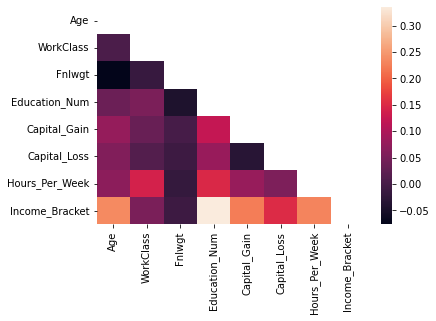

In [30]:
mask = np.triu(np.ones_like(i_df.corr()))

sns.heatmap(cor, mask=mask)

#### Logistic Regression

### Training and Testing the model

In [67]:
i_train, i_test = train_test_split(i_df,train_size = 0.8)

print('Size of training dataset: ', i_train.shape)
print('Size of test dataset: ', i_test.shape)

Size of training dataset:  (26048, 15)
Size of test dataset:  (6513, 15)


In [68]:
X_train = i_train.drop(columns='Income_Bracket', axis =1)
Y_train = i_train['Income_Bracket']
X_test = i_test.drop(columns='Income_Bracket', axis =1)
Y_test = i_test['Income_Bracket']
X_train.shape, Y_train.shape, X_test.shape

((26048, 14), (26048,), (6513, 14))

In [69]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# unseen data
Y_pred = logreg.predict(X_test)
#checking performance of training
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.07

### Slope

In [70]:
# Value of slope

coeff_df = pd.DataFrame(i_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,WorkClass,0.015966
12,Native_Country,0.010255
4,Marital_Status,0.004039
9,Capital_Gain,0.001587
11,Hours_Per_Week,0.000791
10,Capital_Loss,0.000333
2,Education,-0.000002
6,Relationship,-0.001946
8,Gender,-0.004211
1,Fnlwgt,-0.004380


In [71]:
logreg.intercept_

array([-0.00158965])

In [72]:
logreg.score(X_test, Y_test)

0.7792108091509289

In [73]:
np.unique(Y_pred)

array([0, 1])

### Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_pred))

tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[4617  282]
 [1156  458]]
4617 282 1156 458


In [75]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred))
print('f1-score:', f1_score(Y_test, Y_pred))
print('precision:', precision_score(Y_test, Y_pred))

accuracy: 0.7792108091509289
recall: 0.28376703841387857
f1-score: 0.389124893797791
precision: 0.6189189189189189


In [76]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
roc

0.7112247321545784

In [77]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
# calculate AUC
auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.3f' % auc)

AUC: 0.613


In [78]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [79]:
ns_probs = [0 for _ in range(len(Y_test))]

In [80]:
lr_probs = logreg.predict_proba(X_test)

### AUC ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.711


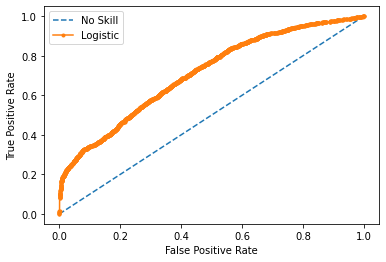

In [81]:
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### The value of AUC is 71%. The Model is good in interpreting TP and FP at an accuracy of 71% overall

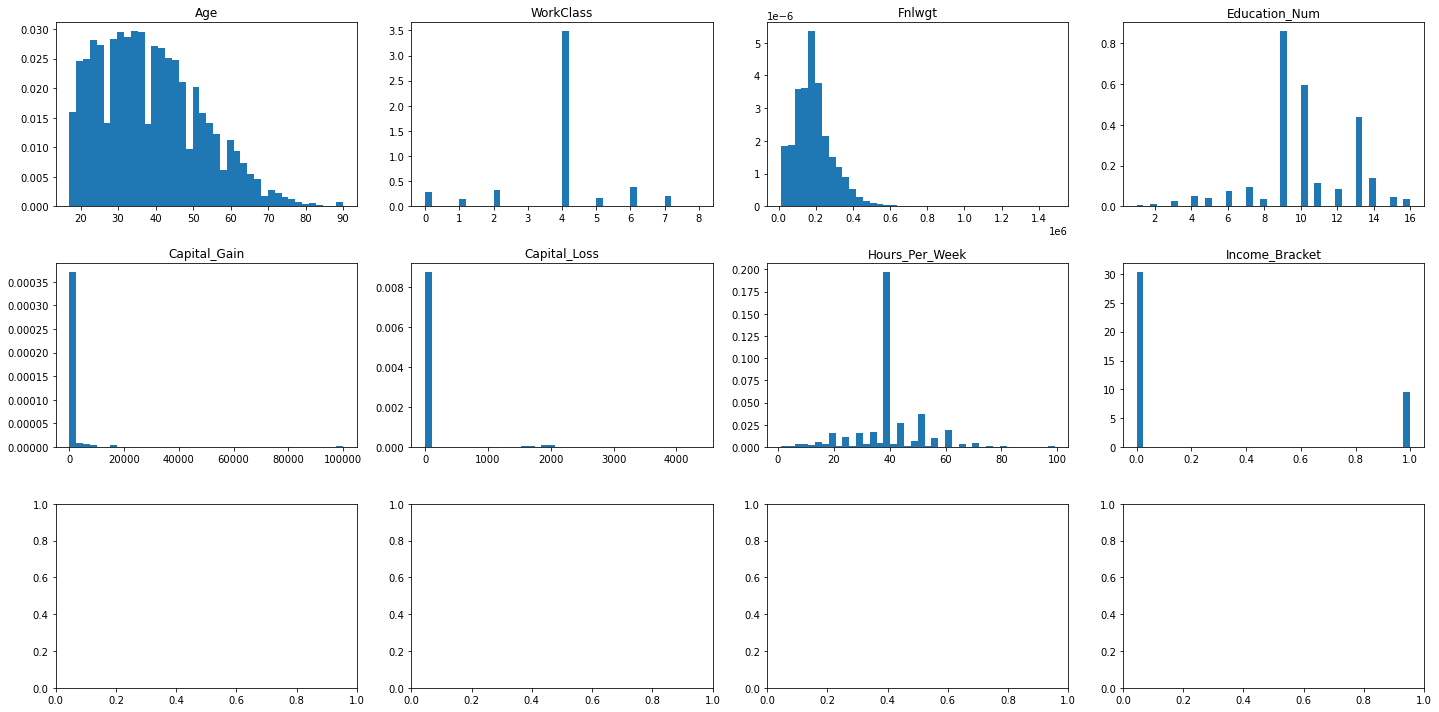

In [29]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

ni2_df = i_df.select_dtypes(include=numerics)
numeric_cols=ni2_df.columns
num_cols=4
n_bins = 40

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(ni2_df[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()